In [25]:
import seaborn as sns
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [26]:
# size별로 tip의 평균에 차이가 있을까?
# one-way anova 분석을 해야하므로 종속변수가 수치형, 독립변수가 명목형인지 확인한다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [29]:
# 정규성 검정
# 독립변수가 정규성을 만족하는지 확인한다. 
df['size'] = df['size'].astype('object')
size_list = df['size'].unique()
size_list

array([2, 3, 4, 1, 6, 5], dtype=object)

array(['Dinner', 'Lunch'], dtype=object)

In [30]:
second = df[df['size'] == size_list[0]]['tip']
third = df[df['size'] == size_list[1]]['tip']
forth = df[df['size'] == size_list[2]]['tip']
first = df[df['size'] == size_list[3]]['tip']
sixth = df[df['size'] == size_list[4]]['tip']
fifth = df[df['size'] == size_list[5]]['tip']

import scipy.stats as stats
print('1 : ' ,stats.shapiro(first))
print('2 : ' ,stats.shapiro(second))
print('3 : ' ,stats.shapiro(third))
print('4 : ' ,stats.shapiro(forth))
print('5 : ' ,stats.shapiro(fifth))
print('6 : ' ,stats.shapiro(sixth))

1 :  ShapiroResult(statistic=0.7710103988647461, pvalue=0.059581734240055084)
2 :  ShapiroResult(statistic=0.9418555498123169, pvalue=4.9456166379968636e-06)
3 :  ShapiroResult(statistic=0.8008999824523926, pvalue=1.0905181625275873e-05)
4 :  ShapiroResult(statistic=0.9343180060386658, pvalue=0.030524587258696556)
5 :  ShapiroResult(statistic=0.7959916591644287, pvalue=0.07513255625963211)
6 :  ShapiroResult(statistic=0.8871753215789795, pvalue=0.37018755078315735)


<AxesSubplot:xlabel='size', ylabel='tip'>

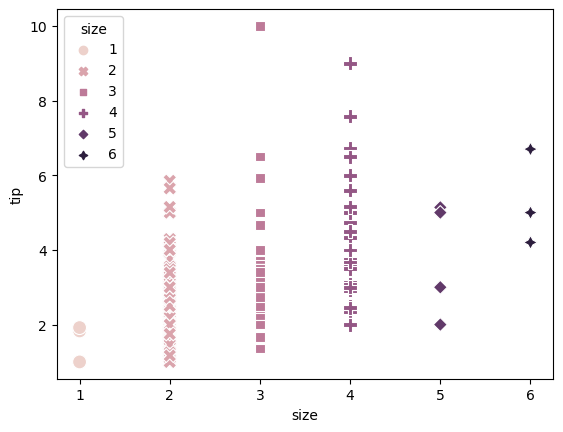

In [31]:
# pclass의 분포를 시각적으로 확인해보자
import seaborn as sns
import matplotlib.pyplot as plt

# scatter plot by Groups

sns.scatterplot(x = 'size',
               y = 'tip',
               hue = 'size',
               style = 'size',
               s = 100,
               data = df)


In [32]:
stats.kruskal(first,second,third,forth,fifth,sixth)

KruskalResult(statistic=56.022145477897574, pvalue=8.041674988058631e-11)

In [ ]:
# 6그룹 간 tip의 차이가 통계적으로 유의하게 있다. 